In [7]:
import numpy as np
from sklearn.model_selection import KFold
import scipy.io as sio

In [8]:
crossvalidation = False
data_path 	= 'dataset/'
NO_splits = 5 # number of folds in cross validation
NO_channels = 22 # number of EEG channels
NO_subjects = 9
Window_Length = 7*250
NO_tests = 6*48

In [9]:
def get_data(subject,training,PATH):
	class_return = np.zeros(NO_tests)
	data_return = np.zeros((NO_tests,NO_channels,Window_Length))

	NO_valid_trial = 0
	if training:
		a = sio.loadmat(PATH+'A0'+str(subject)+'T.mat')
	else:
		a = sio.loadmat(PATH+'A0'+str(subject)+'E.mat')
	a_data = a['data']
	for ii in range(0,a_data.size):
		a_data1 = a_data[0,ii]
		a_data2=[a_data1[0,0]]
		a_data3=a_data2[0]
		a_X 		= a_data3[0]
		a_trial 	= a_data3[1]
		a_y 		= a_data3[2]
		a_fs 		= a_data3[3]
		a_classes 	= a_data3[4]
		a_artifacts = a_data3[5]
		a_gender 	= a_data3[6]
		a_age 		= a_data3[7]
		for trial in range(0,a_trial.size):
			if(a_artifacts[trial]==0):
				data_return[NO_valid_trial,:,:] = np.transpose(a_X[int(a_trial[trial]):(int(a_trial[trial])+Window_Length),:22])
				class_return[NO_valid_trial] = int(a_y[trial])
				NO_valid_trial +=1


	return data_return[0:NO_valid_trial,:,:], class_return[0:NO_valid_trial]

In [10]:
def load_data(subject):
        if crossvalidation:
            data,label = get_data(subject ,True, data_path)
            kf = KFold(n_splits=NO_splits)
            split = 0
            for train_index, test_index in kf.split(data):
                if split == split:
                    train_data = data[train_index]
                    train_label = label[train_index]
                    eval_data = data[test_index]
                    eval_label = label[test_index]
                split += 1
        else:
            train_data, train_label = get_data(subject, True, data_path)
            eval_data, eval_label = get_data(subject, False, data_path)
            
        return train_data, train_label, eval_data, eval_label

In [11]:
X_train = []
X_eval = []
y_train = []
y_eval = []

for subject in range(1,NO_subjects+1):
    train_data, train_label, eval_data, eval_label = load_data(subject)
    X_train.append(train_data)
    X_eval.append(eval_data)
    y_train.append(train_label)
    y_eval.append(eval_label)

In [12]:
print(len(X_train))
print(len(y_train))
print(len(X_eval))
print(len(y_eval))


X_train_mean = []
X_eval_mean = []

#X_train contains all 9 subjects. Indext from 0 to 8 to access and subject.
for i in range(9):
    print(X_train[i].shape)
    print(X_eval[i].shape)
    X_train_mean.append(np.mean(X_train[i], axis=1))
    X_eval_mean.append(np.mean(X_eval[i], axis=1))
    print(X_train_mean[i].shape)
    print(X_eval_mean[i].shape)


9
9
9
9
(273, 22, 1750)
(281, 22, 1750)
(273, 1750)
(281, 1750)
(270, 22, 1750)
(283, 22, 1750)
(270, 1750)
(283, 1750)
(270, 22, 1750)
(273, 22, 1750)
(270, 1750)
(273, 1750)
(262, 22, 1750)
(228, 22, 1750)
(262, 1750)
(228, 1750)
(262, 22, 1750)
(276, 22, 1750)
(262, 1750)
(276, 1750)
(219, 22, 1750)
(215, 22, 1750)
(219, 1750)
(215, 1750)
(271, 22, 1750)
(277, 22, 1750)
(271, 1750)
(277, 1750)
(264, 22, 1750)
(271, 22, 1750)
(264, 1750)
(271, 1750)
(237, 22, 1750)
(264, 22, 1750)
(237, 1750)
(264, 1750)


In [13]:
y_train[0]

array([4., 3., 2., 1., 1., 2., 3., 4., 2., 3., 1., 1., 1., 4., 2., 2., 1.,
       1., 3., 1., 2., 4., 3., 1., 4., 4., 2., 4., 4., 2., 1., 2., 3., 3.,
       3., 4., 3., 1., 4., 2., 3., 2., 3., 4., 3., 1., 1., 1., 4., 2., 3.,
       1., 3., 4., 1., 3., 3., 1., 3., 2., 4., 4., 4., 1., 4., 2., 4., 2.,
       1., 3., 2., 1., 3., 3., 1., 3., 4., 4., 2., 1., 2., 4., 2., 4., 3.,
       2., 2., 2., 3., 1., 2., 3., 3., 4., 1., 1., 2., 4., 4., 4., 2., 1.,
       3., 2., 4., 1., 4., 3., 2., 4., 4., 1., 2., 2., 3., 4., 2., 1., 1.,
       4., 2., 1., 3., 2., 2., 3., 1., 4., 3., 3., 3., 3., 1., 2., 1., 2.,
       1., 1., 3., 3., 2., 3., 4., 1., 4., 1., 1., 2., 4., 3., 2., 4., 3.,
       4., 3., 4., 2., 2., 4., 1., 2., 2., 2., 3., 4., 1., 4., 1., 3., 1.,
       4., 1., 3., 1., 2., 3., 3., 4., 1., 2., 4., 2., 3., 1., 4., 2., 4.,
       1., 1., 3., 3., 2., 4., 2., 2., 1., 2., 4., 4., 2., 2., 2., 2., 4.,
       3., 4., 1., 2., 3., 2., 1., 4., 1., 4., 1., 1., 1., 1., 3., 4., 2.,
       3., 3., 3., 4., 3.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

time_axis = np.linspace(1, 7, 	Window_Length)

In [22]:
print(len(X_train_mean))
print(X_train_mean[0].shape)
print(X_train_mean[0][0].shape)

9
(273, 1750)
(1750,)


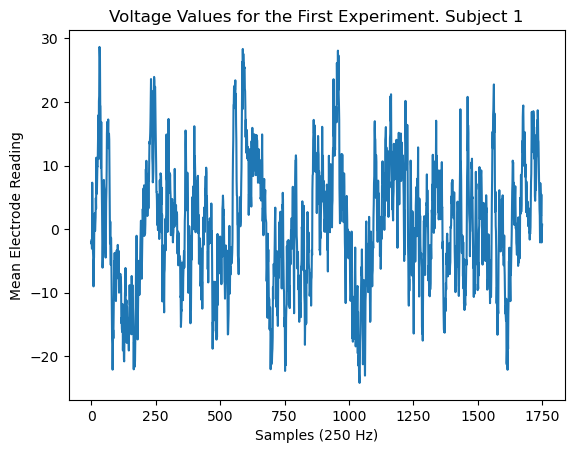

In [28]:
# Averaged output of the 22 channels for the first experiemnt of first
plt.plot(X_train_mean[0][0])

# Add labels and title
plt.xlabel('Samples (250 Hz)')
plt.ylabel('Mean Electrode Reading')
plt.title('Voltage Values for the First Experiment. Subject 1')

# Show the plot
plt.show()

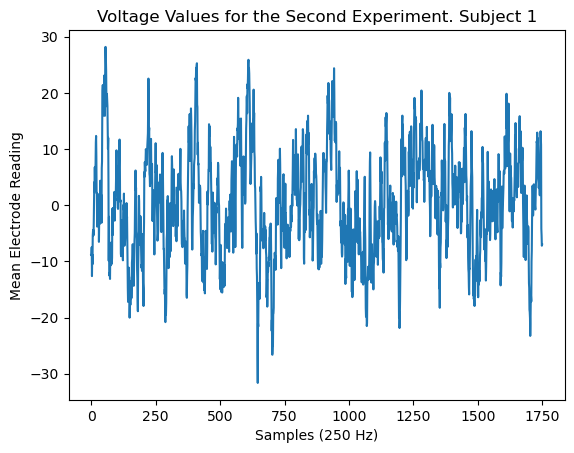

In [27]:
# Averaged output of the 22 channels for the scond experiemnt of first
plt.plot(X_train_mean[0][1])

# Add labels and title
plt.xlabel('Samples (250 Hz)')
plt.ylabel('Mean Electrode Reading')
plt.title('Voltage Values for the Second Experiment. Subject 1')

# Show the plot
plt.show()